In [1]:
import numpy as np

In [2]:
def sigmoid(x): #1/1+e(-x)
  return 1/ (1+np.exp(-x))

def sigmoid_deriv(x):
  return sigmoid(x) *(1- sigmoid(x))

# XOR
# [0,0] = 0
# [0,1] = 1
# [1,0] = 1
# [1,1] = 0

# Dados de entrada (XOR)
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [3]:
print(f'X = \n{X}')
print(f'y = \n{y}')

X = 
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y = 
[[0]
 [1]
 [1]
 [0]]


In [43]:
# Inicialização dos pesos
np.random.seed(42)
peso1 = 2* np.random.random((2, 3)) - 1
print(f'peso1 = \n{peso1}')
peso2 = 2* np.random.random((3, 1)) - 1
print(f'peso2 = \n{peso2}')
taxa_aprendizado  = 0.1 # taxa representada por n na expressão da
                        # atualização dos pesos
erros = []
# Treinamento
for i in range(10000): # épocas de treinamento
  camada_entrada = X
  z1 = np.dot(camada_entrada, peso1) # Inicio FeedForward
  a1 = sigmoid(z1)
  z2 = np.dot(a1, peso2)
  y_hat = sigmoid(z2) # Fim FeedForward

  erro = y - y_hat # Cálcula o erro absoluto
  # mse
  mse = np.mean(erro**2)
  erros.append(mse)

  delta2 = erro * sigmoid_deriv(z2) # Backpropagation erro camada saida
  delta1 = delta2.dot(peso2.T)*sigmoid_deriv(z1) # Backpropagation erro camada oculta

  peso2 += a1.T.dot(delta2) * taxa_aprendizado # Atualização dos pesos
  peso1 += camada_entrada.T.dot(delta1) * taxa_aprendizado

print("Resultado final:")
print(f'y_hat = \n{np.round(y_hat,3)}')
print(f'peso1 = \n{np.round(peso1,3)}')
print(f'peso2 = \n{np.round(peso2,3)}')

peso1 = 
[[-0.25091976  0.90142861  0.46398788]
 [ 0.19731697 -0.68796272 -0.68801096]]
peso2 = 
[[-0.88383278]
 [ 0.73235229]
 [ 0.20223002]]
Resultado final:
y_hat = 
[[0.157]
 [0.456]
 [0.84 ]
 [0.207]]
peso1 = 
[[-3.518  2.154  3.692]
 [-4.867 -5.255 -2.439]]
peso2 = 
[[-5.57 ]
 [ 4.16 ]
 [-1.954]]


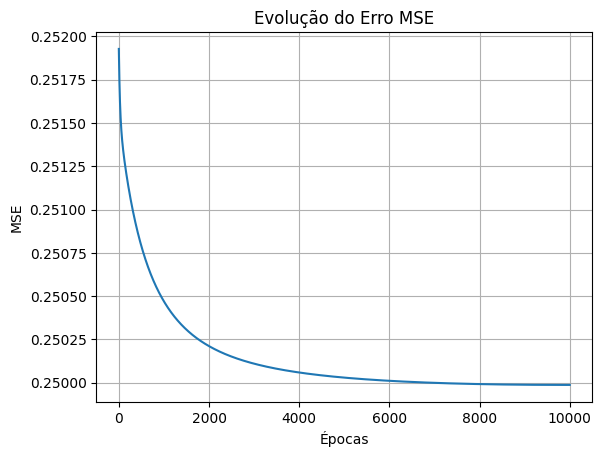

In [42]:
# plot da Evolução do Erro MSE
import matplotlib.pyplot as plt

plt.plot(erros)
plt.title('Evolução do Erro MSE')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.grid()
plt.show()